In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

pd.set_option("display.max_columns",100)
pd.set_option("display.max_rows",100)

In [2]:
df=pd.read_csv("PBL5recommendationdata.csv", encoding='ISO-8859-1', engine = 'python') #Karakter hatasi verdigi icin encoding uyguladik

In [3]:
df # 4194 rows × 181 columns

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,Customers.sales_rep,Customers.rewards,Customers.profile_id,Customers.last_modified,Customers.customer_type,Orders.id,Orders.customer_id,Orders.fname,Orders.lname,Orders.company,Orders.order_number,Orders.reorder_id,Orders.external_source,Orders.external_id,Orders.currency,Orders.sales_rep,Orders.subtotal,Orders.tax,Orders.shipping,Orders.coupon_id,Orders.coupon_amount,Orders.gift_id,Orders.gift_amount,Orders.fee_name,Orders.fee_amount,Orders.discount_name,Orders.discount_amount,Orders.total,Orders.balance_due,Orders.shipping_carrier,Orders.shipping_method,Orders.shipping_trans,Orders.shipping_flags,Orders.weight,Orders.tracking,Orders.payment_status,Orders.payment_date,Orders.payment_user,Orders.payment_type,Orders.payment_method,...,Products.seo_description,Products.seo_keywords,Products.seo_header,Products.seo_footer,Products.seo_url,Products.seo_category,Products.unit,Products.packaging,Products.display_packaging,Products.multiple,Products.length,Products.width,Products.height,Products.rx,Products.latex,Products.upc,Products.msds_link,Products.msds_label,Products.lit_link,Products.lit_label,Products.hcpcs,Products.case_qty,Products.markup,Products.override_markup,Products.notes,Products.import_flags,Products.map_price,Products.features_title,Products.warranty,Products.hygienic,Products.default_quantity,Products.user_size,Products.assembly,Products.installation,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.shipping_weight,Products.handling_time,Products.rotation_link,Products.google_shopping_label,Products.product_option,Products.size,Products.material,Products.arm_style,Products.leg_style,Products.seat_size,Products.family_id,Products.saved_status,Products.freight_cost
0,797,Christy,Dill,Company0,1426018724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437764306,0.0,3758,797,Christy,Dill,Company0,3758,NaN,NaN,NaN,USD,NaN,57.20,0.00,9.95,13.0,2.86,NaN,NaN,NaN,NaN,NaN,NaN,64.29,NaN,fedex,11|Ground,NaN,NaN,NaN,5.7204E+14,3.0,1.426019e+09,NaN,authorize.net,NaN,...,NaN,NaN,NaN,NaN,Basic-Rollators-For-Adults-With-Seat-Green-6-W...,0.0,EA,1 Each / Each,NaN,1 EA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E0149 +E0156,1.0,NaN,0.0,NaN,136.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,24.80,7.50,30.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF61071,0.0,NaN
1,3,John,Smith,Company1,1386089139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437764354,0.0,23,3,John,Smith,Company1,23,NaN,NaN,NaN,USD,NaN,20.00,NaN,9.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.99,NaN,fedex,11|Ground,NaN,NaN,NaN,1.28597E+14,3.0,1.386090e+09,NaN,authorize.net,NaN,...,NaN,NaN,NaN,NaN,Urinary-Drain-Bags0000,0.0,EA,1 Each / Each,NaN,1 EA,NaN,NaN,NaN,Rx,Yes,NaN,NaN,NaN,https://medline360.medline.com:443/irj/servlet...,508f2d75-582e-2e10-2eab-d83980a9b1d0,A4357,1.0,NaN,0.0,OFF sale cause it is an RX item,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,8.00,7.00,1.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF02132,NaN,NaN
2,3,John,Smith,Company1,1386089139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437764354,0.0,9531,3,John,Smith,Company1,9531,NaN,NaN,NaN,USD,NaN,68.78,0.00,9.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.73,NaN,manual,0|Standard Shipping,NaN,NaN,NaN,NaN,3.0,1.449604e+09,genlee166,authorize.net,NaN,...,NaN,NaN,NaN,NaN,SensiCare-Nitrile-Exam-GlovesBlueXX-Large,0.0,CS,800 Each / Case,NaN,1 CS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO GOVERNMENT OR SUPPLIER HCPCS CODE VERIFICATION,800.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.23,10.04,10.24,NaN,NaN,NaN,NaN,NaN,2 x Extra large,Nitrile,NaN,NaN,NaN,PF00342,0.0,NaN
3,4,James,Anderson,NaN,1386780263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437762646,0.0,29,4,James,Anderson,NaN,29,NaN,Ebay,NaN,USD,NaN,19.56,0.00,9.95,NaN,NaN,NaN,NaN,NaN,0.04,NaN,NaN,29.55,NaN,NaN,11|Ground,NaN,NaN,NaN,7.96468E+14,3.0,1.386780e+09,NaN,NaN,Credit Card,...,NaN,NaN,NaN,NaN,Basket-for-2-B

In [4]:
df.head()

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,Customers.sales_rep,Customers.rewards,Customers.profile_id,Customers.last_modified,Customers.customer_type,Orders.id,Orders.customer_id,Orders.fname,Orders.lname,Orders.company,Orders.order_number,Orders.reorder_id,Orders.external_source,Orders.external_id,Orders.currency,Orders.sales_rep,Orders.subtotal,Orders.tax,Orders.shipping,Orders.coupon_id,Orders.coupon_amount,Orders.gift_id,Orders.gift_amount,Orders.fee_name,Orders.fee_amount,Orders.discount_name,Orders.discount_amount,Orders.total,Orders.balance_due,Orders.shipping_carrier,Orders.shipping_method,Orders.shipping_trans,Orders.shipping_flags,Orders.weight,Orders.tracking,Orders.payment_status,Orders.payment_date,Orders.payment_user,Orders.payment_type,Orders.payment_method,...,Products.seo_description,Products.seo_keywords,Products.seo_header,Products.seo_footer,Products.seo_url,Products.seo_category,Products.unit,Products.packaging,Products.display_packaging,Products.multiple,Products.length,Products.width,Products.height,Products.rx,Products.latex,Products.upc,Products.msds_link,Products.msds_label,Products.lit_link,Products.lit_label,Products.hcpcs,Products.case_qty,Products.markup,Products.override_markup,Products.notes,Products.import_flags,Products.map_price,Products.features_title,Products.warranty,Products.hygienic,Products.default_quantity,Products.user_size,Products.assembly,Products.installation,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.shipping_weight,Products.handling_time,Products.rotation_link,Products.google_shopping_label,Products.product_option,Products.size,Products.material,Products.arm_style,Products.leg_style,Products.seat_size,Products.family_id,Products.saved_status,Products.freight_cost
0,797,Christy,Dill,Company0,1426018724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437764306,0.0,3758,797,Christy,Dill,Company0,3758,NaN,NaN,NaN,USD,NaN,57.20,0.0,9.95,13.0,2.86,NaN,NaN,NaN,NaN,NaN,NaN,64.29,NaN,fedex,11|Ground,NaN,NaN,NaN,5.7204E+14,3.0,1.426019e+09,NaN,authorize.net,NaN,...,NaN,NaN,NaN,NaN,Basic-Rollators-For-Adults-With-Seat-Green-6-W...,0.0,EA,1 Each / Each,NaN,1 EA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E0149 +E0156,1.0,NaN,0.0,NaN,136.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,24.80,7.50,30.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF61071,0.0,NaN
1,3,John,Smith,Company1,1386089139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437764354,0.0,23,3,John,Smith,Company1,23,NaN,NaN,NaN,USD,NaN,20.00,NaN,9.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.99,NaN,fedex,11|Ground,NaN,NaN,NaN,1.28597E+14,3.0,1.386090e+09,NaN,authorize.net,NaN,...,NaN,NaN,NaN,NaN,Urinary-Drain-Bags0000,0.0,EA,1 Each / Each,NaN,1 EA,NaN,NaN,NaN,Rx,Yes,NaN,NaN,NaN,https://medline360.medline.com:443/irj/servlet...,508f2d75-582e-2e10-2eab-d83980a9b1d0,A4357,1.0,NaN,0.0,OFF sale cause it is an RX item,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,8.00,7.00,1.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF02132,NaN,NaN
2,3,John,Smith,Company1,1386089139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437764354,0.0,9531,3,John,Smith,Company1,9531,NaN,NaN,NaN,USD,NaN,68.78,0.0,9.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.73,NaN,manual,0|Standard Shipping,NaN,NaN,NaN,NaN,3.0,1.449604e+09,genlee166,authorize.net,NaN,...,NaN,NaN,NaN,NaN,SensiCare-Nitrile-Exam-GlovesBlueXX-Large,0.0,CS,800 Each / Case,NaN,1 CS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO GOVERNMENT OR SUPPLIER HCPCS CODE VERIFICATION,800.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.23,10.04,10.24,NaN,NaN,NaN,NaN,NaN,2 x Extra large,Nitrile,NaN,NaN,NaN,PF00342,0.0,NaN
3,4,James,Anderson,NaN,1386780263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437762646,0.0,29,4,James,Anderson,NaN,29,NaN,Ebay,NaN,USD,NaN,19.56,0.0,9.95,NaN,NaN,NaN,NaN,NaN,0.04,NaN,NaN,29.55,NaN,NaN,11|Ground,NaN,NaN,NaN,7.96468E+14,3.0,1.386780e+09,NaN,NaN,Credit Card,...,NaN,NaN,NaN,NaN,Basket-for-2-Butt

In [5]:
df.tail()

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,Customers.sales_rep,Customers.rewards,Customers.profile_id,Customers.last_modified,Customers.customer_type,Orders.id,Orders.customer_id,Orders.fname,Orders.lname,Orders.company,Orders.order_number,Orders.reorder_id,Orders.external_source,Orders.external_id,Orders.currency,Orders.sales_rep,Orders.subtotal,Orders.tax,Orders.shipping,Orders.coupon_id,Orders.coupon_amount,Orders.gift_id,Orders.gift_amount,Orders.fee_name,Orders.fee_amount,Orders.discount_name,Orders.discount_amount,Orders.total,Orders.balance_due,Orders.shipping_carrier,Orders.shipping_method,Orders.shipping_trans,Orders.shipping_flags,Orders.weight,Orders.tracking,Orders.payment_status,Orders.payment_date,Orders.payment_user,Orders.payment_type,Orders.payment_method,...,Products.seo_description,Products.seo_keywords,Products.seo_header,Products.seo_footer,Products.seo_url,Products.seo_category,Products.unit,Products.packaging,Products.display_packaging,Products.multiple,Products.length,Products.width,Products.height,Products.rx,Products.latex,Products.upc,Products.msds_link,Products.msds_label,Products.lit_link,Products.lit_label,Products.hcpcs,Products.case_qty,Products.markup,Products.override_markup,Products.notes,Products.import_flags,Products.map_price,Products.features_title,Products.warranty,Products.hygienic,Products.default_quantity,Products.user_size,Products.assembly,Products.installation,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.shipping_weight,Products.handling_time,Products.rotation_link,Products.google_shopping_label,Products.product_option,Products.size,Products.material,Products.arm_style,Products.leg_style,Products.seat_size,Products.family_id,Products.saved_status,Products.freight_cost
4189,3730,Nora,Fontana,NaN,1463408698,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1463408698,0.0,17421,3730,Nora,Fontana,NaN,17421,NaN,NaN,NaN,USD,NaN,14.85,1.21,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.463409e+09,NaN,paypal,PayPal,...,Shop CareLineMedical.com For the Top Rated Med...,"barf bag, emesis bags, vomit bags, barf bags, ...",NaN,NaN,Emesis-BagsBlue-2,0.0,PK,24 Each / Pack,NaN,1 PK,NaN,NaN,NaN,NaN,Yes,8.843890e+11,NaN,NaN,NaN,NaN,NO CODE - PRODUCT DOES NOT MEET HCPCS SPECIFIC...,24.0,NaN,1.0,NaN,418.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,5.00,5.00,7.00,NaN,NaN,NaN,NaN,NaN,NaN,Plastic Rim,NaN,NaN,NaN,PF06157,3.0,NaN
4190,3732,Kennithe,Tecora,NaN,1463412756,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1463412756,NaN,17425,3732,Kennithe,Tecora,NaN,17425,NaN,NaN,NaN,USD,NaN,39.99,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.463413e+09,Berry,authorize.net,NaN,...,NaN,NaN,NaN,NaN,Bed-Assist-Bar,0.0,EA,1 Each / Each,NaN,1 EA,NaN,NaN,NaN,NaN,Yes,8.843890e+11,NaN,NaN,NaN,NaN,NO GOVERNMENT OR SUPPLIER HCPCS CODE VERIFICATION,1.0,NaN,0.0,NaN,128.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,14.60,4.10,18.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF08485,3.0,NaN
4191,3733,Tinna,Randall,NaN,1463413245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1463413245,NaN,17426,3733,Tinna,Randall,NaN,17426,NaN,NaN,NaN,USD,NaN,1099.00,0.00,NaN,32.0,109.9,NaN,NaN,NaN,NaN,NaN,NaN,989.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.463413e+09,Berry,authorize.net,NaN,...,NaN,power scooter; electric power scooter; electri...,NaN,NaN,Spitfire-EX-Travel-4-Wheel-Mobility-Scooter-21...,0.0,EA,NaN,NaN,NaN,42.0,20.0,35.0,No,Not Made With Natura,8.223830e+11,NaN,NaN,http://www.drivemedical.com/product-manuals/sp...,NaN,K0800,NaN,NaN,0.0,NaN,128.0,1099.00,NaN,Limited Lifetime on Frame; 14 Month Limited on...,0.0,NaN,Universal,Basic Assembly Required,No Installation Required,45.00,20.75,20.75,127.0,Ships Same Day,https://www.drivemedical.com/power-mobility/sp...,NaN,21AH Batteries,NaN,NaN,NaN,NaN,NaN,PM36,3.0,NaN
4192,3735,HALIMAH,SHAHID,NaN,1463416687,NaN,1.0,NaN,Na

In [6]:
df.describe()

,Customers.id,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,Customers.sales_rep,Customers.rewards,Customers.profile_id,Customers.last_modified,Customers.customer_type,Orders.id,Orders.customer_id,Orders.reorder_id,Orders.external_id,Orders.sales_rep,Orders.subtotal,Orders.tax,Orders.shipping,Orders.coupon_id,Orders.coupon_amount,Orders.gift_id,Orders.gift_amount,Orders.fee_amount,Orders.discount_amount,Orders.total,Orders.balance_due,Orders.shipping_trans,Orders.shipping_flags,Orders.weight,Orders.payment_status,Orders.payment_date,Orders.payment_amount,Orders.purchase_order,Orders.payment_ref,Orders.status,Orders.placed_date,Orders.updated_date,Orders.shipped_date,Orders.registry_id,Orders.gift_message,Orders.website,Orders.mailing,Orders.flags,Orders.partial_ship,Orders.customer_type,Order_Items.id,Order_Items.parent,Order_Items.product_id,...,Order_Items.account_id,Order_Items.flags,Products.id,Products.status,Products.product_type,Products.vendor,Products.import_id,Products.menu_name,Products.list_price,Products.price,Products.sale_price,Products.cost,Products.flags,Products.left_flag,Products.right_flag,Products.last_modified,Products.taxable,Products.shopping_gtin,Products.shopping_flags,Products.amazon_type,Products.amazon_price,Products.google_adwords,Products.shopping_cat,Products.shopzilla_cat,Products.qb_edit_sequence,Products.price_break_type,Products.price_breaks,Products.websites,Products.audio,Products.seo_footer,Products.seo_category,Products.length,Products.width,Products.height,Products.upc,Products.case_qty,Products.markup,Products.override_markup,Products.import_flags,Products.map_price,Products.hygienic,Products.default_quantity,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.shipping_weight,Products.google_shopping_label,Products.leg_style,Products.saved_status,Products.freight_cost
count,4194.000000,4.194000e+03,101.0,2114.000000,0.0,5.000000,3.000000,0.0,0.0,0.0,4.194000e+03,3771.000000,4194.000000,4194.000000,82.000000,5.000000e+00,0.0,4194.000000,3737.000000,3999.000000,882.000000,882.000000,0.0,0.0,278.000000,364.000000,4194.000000,351.000000,0.0,0.0,3.000000,4189.000000,4.176000e+03,4176.000000,0.0,0.0,4194.000000,4.194000e+03,4.171000e+03,3.848000e+03,0.0,0.0,0.0,0.0,1.0,96.000000,4011.000000,4194.000000,4194.000000,4151.000000,...,0.0,1008.000000,4037.000000,4037.000000,0.0,4037.000000,4037.000000,0.0,4017.000000,4036.000000,1160.000000,4037.000000,2987.000000,1239.000000,0.0,4.037000e+03,2959.000000,3.130000e+03,3917.000000,0.0,592.000000,0.0,2334.0,2334.0,3.728000e+03,0.0,0.0,0.0,0.0,0.0,2837.0,998.000000,996.000000,996.000000,2.127000e+03,2638.000000,0.0,2920.000000,2786.000000,122.000000,2080.000000,0.0,3998.000000,3998.000000,3998.000000,659.000000,387.000000,0.0,3930.000000,0.0
mean,1796.518121,1.440971e+09,0.0,0.979659,NaN,0.200000,7.333333,NaN,NaN,NaN,1.450401e+09,0.137364,9142.984025,1796.518121,7389.158537,6.018061e+08,NaN,131.925196,0.800838,7.141263,20.403628,9.972676,NaN,NaN,14.752590,13.086676,137.192818,47.981396,NaN,NaN,18.000000,2.958940,1.443104e+09,134.842263,NaN,NaN,1.326180,1.443054e+09,1.449607e+09,1.442167e+09,NaN,NaN,NaN,NaN,1.0,0.010417,0.124159,11156.068670,9142.984025,4451.426162,...,NaN,1.916667,4518.398068,0.987119,NaN,1.629676,3.400297,NaN,121.683321,74.266043,70.754095,52.318192,9549.464680,5.811138,NaN,1.462428e+09,0.940858,2.865179e+13,61.543528,NaN,89.727855,NaN,199.0,22005.0,1.450329e+09,NaN,NaN,NaN,NaN,NaN,0.0,21.292014,19.191185,13.587992,5.504591e+11,162.885140,NaN,0.166438,65.059943,181.696967,0.064423,NaN,17.208216,10.872750,11.592447,15.487041,3.863049,NaN,0.876336,NaN
std,1065.679090,1.887681e+07,0.0,0.141196,NaN,0.447214,0.577350,NaN,NaN,NaN,1.021334e+07,0.391842,5276.541078,1065.679090,3818.085460,1.342831e+09,NaN,231.156869,4.859280,4.531500,11.850291,14.617203,NaN,NaN,32.755244,51.296654,222.898475,209.843126,NaN,NaN,6.928203,0.312482,1.809258e+0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Columns: 181 entries, Customers.id to Products.freight_cost
dtypes: float64(98), int64(10), object(73)
memory usage: 5.8+ MB


In [8]:
df.isnull().sum()

Customers.id                0
Customers.fname             0
Customers.lname             0
Customers.company        3467
Customers.create_date       0
                         ... 
Products.leg_style       4194
Products.seat_size       4032
Products.family_id        325
Products.saved_status     264
Products.freight_cost    4194
Length: 181, dtype: int64

In [9]:
# Bos olan degerleri gormek icin dataframe aktardim ve siralama yaptim. 
# Eger verilerin %20 sinden fazlasi (yaklasik 800 veri) bos ise bunlari silelim
null_columns=pd.DataFrame(df.isnull().sum().sort_values(ascending=False))
null_columns

,0
Products.freight_cost,4194
Orders.mailing,4194
Orders.gift_message,4194
Orders.registry_id,4194
Products.right_flag,4194
...,...
Order_Items.parent,0
Order_Items.product_name,0
Order_Items.qty,0
Order_Items.price,0


In [10]:
# 800 veriye kadar olanlari aldim
not_null=null_columns[null_columns[0]<800]
not_null

,0
Orders.payment_code,748
Orders.shipping_carrier,617
Products.display_name,532
Products.quickbooks_id,466
Products.qb_edit_sequence,466
Orders.tax,457
Orders.shipping_method,443
Orders.payment_id,430
Customers.customer_type,423
Products.google_shopping_id,414


In [11]:
#dolu olan degerleri almak icin index degerlerine gore secim yaptim
m=[];
for i in not_null.index:
    m.append(i)
m

['Orders.payment_code',
 'Orders.shipping_carrier',
 'Products.display_name',
 'Products.quickbooks_id',
 'Products.qb_edit_sequence',
 'Orders.tax',
 'Orders.shipping_method',
 'Orders.payment_id',
 'Customers.customer_type',
 'Products.google_shopping_id',
 'Orders.payment_type',
 'Orders.tracking',
 'Orders.shipped_date',
 'Products.family_id',
 'Products.shopping_flags',
 'Products.saved_status',
 'Products.template',
 'Products.google_shopping_type',
 'Products.unit',
 'Products.shipping_width',
 'Products.shipping_length',
 'Products.shipping_height',
 'Orders.shipping',
 'Products.long_description',
 'Products.google_shopping_cat',
 'Orders.customer_type',
 'Products.seo_title',
 'Products.amazon_item_type',
 'Products.list_price',
 'Products.shopping_brand',
 'Products.shopping_mpn',
 'Products.price',
 'Products.id',
 'Products.name',
 'Products.last_modified',
 'Products.cost',
 'Products.status',
 'Products.vendor',
 'Products.import_id',
 'Products.seo_url',
 'Order_Items.p

In [12]:
# yeni df2 datamizi alabiliriz
df2=df[m]
df2

,Orders.payment_code,Orders.shipping_carrier,Products.display_name,Products.quickbooks_id,Products.qb_edit_sequence,Orders.tax,Orders.shipping_method,Orders.payment_id,Customers.customer_type,Products.google_shopping_id,Orders.payment_type,Orders.tracking,Orders.shipped_date,Products.family_id,Products.shopping_flags,Products.saved_status,Products.template,Products.google_shopping_type,Products.unit,Products.shipping_width,Products.shipping_length,Products.shipping_height,Orders.shipping,Products.long_description,Products.google_shopping_cat,Orders.customer_type,Products.seo_title,Products.amazon_item_type,Products.list_price,Products.shopping_brand,Products.shopping_mpn,Products.price,Products.id,Products.name,Products.last_modified,Products.cost,Products.status,Products.vendor,Products.import_id,Products.seo_url,Order_Items.product_id,Orders.updated_date,Orders.payment_amount,Orders.payment_date,Orders.payment_status,Order_Items.cost,Orders.customer_id,Orders.order_number,Orders.id,Orders.fname,Customers.last_modified,Customers.create_date,Customers.lname,Orders.lname,Orders.total,Orders.currency,Orders.subtotal,Customers.fname,Orders.status,Orders.placed_date,Order_Items.id,Order_Items.parent,Order_Items.product_name,Order_Items.qty,Order_Items.price,Customers.id
0,510142,fedex,"Basic Lightweight Rollators For Adults, With S...",8000064C-1434298761,1.450325e+09,0.00,11|Ground,6993607863,0.0,generic/online%3Aen%3AUS%3A2310,authorize.net,5.7204E+14,1.426101e+09,PF61071,62.0,0.0,sub-product-detail.html,"Walking Aids > Rollators, & Walkers > Rollators",EA,7.50,24.80,30.40,9.95,"<ul><li> Classically designed, value priced</...",Health & Beauty > Health Care,0.0,"Basic Lightweight Rollators For Adults, With S...",health-care-products,80.70,MEDLINE,MDS86850EGS,57.64,2310.0,"Basic Steel Rollators,Green",1.463163e+09,44.00,0.0,1.0,3.0,Basic-Rollators-For-Adults-With-Seat-Green-6-W...,2310.0,1.438868e+09,64.29,1.426019e+09,3.0,44.00,797,3758,3758,Christy,1437764306,1426018724,Dill,Dill,64.29,USD,57.20,Christy,1,1426019099,5284,3758,"Basic Rollators, Green",1,57.20,797
1,0,fedex,Urinary Drain Bags,80008C35-1438901283,1.450322e+09,NaN,11|Ground,0,0.0,NaN,authorize.net,1.28597E+14,1.386103e+09,PF02132,62.0,NaN,sub-product-detail.html,"Incontinence, Urology & Ostomy > Urology > Dra...",EA,7.00,8.00,1.50,9.99,<ul><li> Only Medline drain bags have a slide...,Health & Beauty > Health Care,0.0,Urinary Drain Bags | MEDLINE - DYNC1674H,health-care-products,14.41,MEDLINE,DYNC1674H,10.29,177.0,Urinary Drain Bags,1.462370e+09,1.87,1.0,1.0,3.0,Urinary-Drain-Bags0000,177.0,1.440529e+09,29.99,1.386090e+09,3.0,1.87,3,23,23,John,1437764354,1386089139,Smith,Smith,29.99,USD,20.00,John,1,1386090455,31,23,"Urinary Drain Bags,0.000",4,5.00,3
2,0,manual,"SensiCare Nitrile Exam Gloves, Blue, XX-Large",800087BB-1438898332,1.450321e+09,0.00,0|Standard Shipping,0,0.0,generic/online%3Aen%3AUS%3A1,authorize.net,NaN,NaN,PF00342,62.0,0.0,sub-product-detail.html,Apparel > Gloves > Nonsterile PF LF Synthetic ...,CS,10.04,13.23,10.24,9.95,<ul><li> SensiCare&reg; nitrile exam gloves fe...,Health & Beauty > Health Care,0.0,"Nitrile Exam Gloves, Blue, XX-Large | MEDLINE ...",health-care-products,96.29,MEDLINE,484805,68.78,1.0,"SensiCare Nitrile Exam Gloves,Blue,XX-Large",1.463163e+09,52.50,0.0,1.0,3.0,SensiCare-Nitrile-Exam-GlovesBlueXX-Large,1.0,1.450213e+09,78.73,1.449604e+09,3.0,52.50,3,9531,9531,John,1437764354,1386089139,Smith,Smith,78.73,USD,68.78,John,3,1449603652,11655,9531,"SensiCare Nitrile Exam Gloves, Blue, XX-Large",1,68.78,3
3,NaN,NaN,Basket for 2-Button Walkers,8000065E-1434298780,1.450323e+09,0.00,11|Ground,NaN,0.0,NaN,NaN,7.96468E+14,1.386800e+09,PF04970,62.0,NaN,sub-product-detail.html,"Walking Aids > Rollators, & Walkers > Walkers ...",EA,7.80,10.60,18.50,9.95,<ul><li> This wire basket attaches to almost a...,Health & Beauty > Health Care,0.0,Basket for 2-Button Walkers | MEDLINE - MDS866...,health-care-products,27.38,MEDLINE,MDS86615KH,19.56,983.0,Bas

In [13]:
# Bos olan degerleri ortalama degerer ile dolduralim
#object boş değerler ortalamar ile dolduralim
for i in df2.select_dtypes(include=np.object):
    df2[i].fillna(df2[i].value_counts().sort_values(ascending=False).index[0],inplace=True)

In [14]:
#sayısal boş değerler ortalamalar ile dolduralim
for i in df2.select_dtypes(include=np.number):
    df2[i].fillna(df2[i].mean(),inplace=True)

In [15]:
df2.isnull().sum()

Orders.payment_code              0
Orders.shipping_carrier          0
Products.display_name            0
Products.quickbooks_id           0
Products.qb_edit_sequence        0
Orders.tax                       0
Orders.shipping_method           0
Orders.payment_id                0
Customers.customer_type          0
Products.google_shopping_id      0
Orders.payment_type              0
Orders.tracking                  0
Orders.shipped_date              0
Products.family_id               0
Products.shopping_flags          0
Products.saved_status            0
Products.template                0
Products.google_shopping_type    0
Products.unit                    0
Products.shipping_width          0
Products.shipping_length         0
Products.shipping_height         0
Orders.shipping                  0
Products.long_description        0
Products.google_shopping_cat     0
Orders.customer_type             0
Products.seo_title               0
Products.amazon_item_type        0
Products.list_price 

In [16]:
df2.shape

(4194, 66)

In [17]:
# Get dummnies ile tum degerleri sayisal degerlere cevirelim

x=pd.get_dummies(df2,drop_first=True)

In [23]:
x

,Products.qb_edit_sequence,Orders.tax,Customers.customer_type,Orders.shipped_date,Products.shopping_flags,Products.saved_status,Products.shipping_width,Products.shipping_length,Products.shipping_height,Orders.shipping,Orders.customer_type,Products.list_price,Products.price,Products.id,Products.last_modified,Products.cost,Products.status,Products.vendor,Products.import_id,Order_Items.product_id,Orders.updated_date,Orders.payment_amount,Orders.payment_date,Orders.payment_status,Order_Items.cost,Orders.customer_id,Orders.id,Customers.last_modified,Customers.create_date,Orders.total,Orders.subtotal,Orders.status,Orders.placed_date,Order_Items.id,Order_Items.parent,Order_Items.qty,Order_Items.price,Customers.id,Orders.payment_code_00000C,Orders.payment_code_00007B,Orders.payment_code_00015B,Orders.payment_code_00025A,Orders.payment_code_00036G,Orders.payment_code_00066C,Orders.payment_code_00073C,Orders.payment_code_00078A,Orders.payment_code_00098D,Orders.payment_code_00101P,Orders.payment_code_00112B,Orders.payment_code_00127R,...,"Order_Items.product_name_Walker Rollator with 6"" Wheels, Fold Up Removable Back Support and Padded Seat, Red","Order_Items.product_name_Walker Rollator with 6"" Wheels, Fold Up Removable Back Support, and Padded Seat","Order_Items.product_name_Walker Rollator with Fold Up Removable Back Support and Padded Seat, Blue","Order_Items.product_name_Walker Rollator with Fold Up Removable Back Support and Padded Seat, Green","Order_Items.product_name_Walker Rollator with Fold Up Removable Back Support and Padded Seat, Red",Order_Items.product_name_Walker Ski/Glider,"Order_Items.product_name_Walking Crutches with Underarm Pad and Handgrip, Youth","Order_Items.product_name_Wall mat hanger, 86"" L x 8"" H x 16"" D, 10 capacity",Order_Items.product_name_Wallaby Headrest Extension,"Order_Items.product_name_Wallaby Pediatric Folding Wheelchair, 12"" Seat","Order_Items.product_name_Wallaby Pediatric Folding Wheelchair, 14"" Seat","Order_Items.product_name_Washable Cotton Gait Belts, Black","Order_Items.product_name_Washable Cotton Gait Belts, Yellow","Order_Items.product_name_Washable Cotton Material Gait Belts, Red, White & Blue Stripes","Order_Items.product_name_Water-Soluble Hamper Liners, Clear 26""x33""","Order_Items.product_name_Waterproof Cast Protector, Arm Cast",Order_Items.product_name_WaxWel&reg; Paraffin Bath - Accessory Package - 6 Terry Hand Mitts ONLY,"Order_Items.product_name_Wedge Cushion with Stretch Cover, 18""",Order_Items.product_name_Wheelchair Anti-Fold/Anti-Theft Devices,Order_Items.product_name_Wheelchair Carry Pouch for Oxygen Cylinders,Order_Items.product_name_Wheelchair Drainage Bag Holders,Order_Items.product_name_Wheelchair Elevating Legrest Assembly Part,Order_Items.product_name_Wheelchair IV Pole Attachments,"Order_Items.product_name_Wheelchair Oxygen Tank Holder by Maddak, Black",Order_Items.product_name_Wheelchair Rear Anti-Tip Devices,"Order_Items.product_name_Wheelchair Seat Belt, Auto Style Closure, 48""","Order_Items.product_name_Wheelchair Seat Belt, Auto Style Closure, 60""","Order_Items.product_name_Wheelchair Seat Belt, Hook-and-Loop Fasteners, 60""",Order_Items.product_name_Wheelchair Wheel Lock/Brake Assembly,"Order_Items.product_name_Wheelchair tray with rim and straps, 24"" x 20"", wood finish","Order_Items.product_name_Wheelchair tray, economy, 24"" x 20"", wood finish",Order_Items.product_name_Winnie Deluxe 3 Wheel Walker Rollator,Order_Items.product_name_Winnie Lite Supreme 3 Wheel Walker Rollator,"Order_Items.product_name_Winnie Wagon All Purpose Shopping Utility Cart, Black","Order_Items.product_name_Wooden Applicator Sticks, 6.00 IN",Order_Items.product_name_Wound Measuring Bullseye,Order_Items.product_name_Woven Sterile Gauze Sponges,"Order_Items.product_name_Wrist and Forearm Splint with Abducted Thumb, Large","Order_Items.product_name_Wrist and Forearm Splint with Abducted Thumb, Medium","Order_Items.product_name_Wrist and Forearm Splint with Abducted Thumb, Sma

In [18]:
all_score=[]
all_clusters=[]
sum_of_squared_distances=[]
predicts=[]
def cluster(clusters):
    for i in np.arange(2,clusters):
        K=KMeans(n_clusters=i)
        K.fit(x)
        predict_kmeans=K.predict(x)
        score=silhouette_score(x,predict_kmeans)
        all_score.append(score)
        all_clusters.append(i)
        sum_of_squared_distances.append(K.inertia_)
        predicts.append(predict_kmeans)
        print(f"cluster={i}, score={score}") 

In [19]:
cluster(10)

cluster=2, score=0.628525229217286
cluster=3, score=0.5633175005732534
cluster=4, score=0.49230292692619493
cluster=5, score=0.48356517321495524
cluster=6, score=0.5024961969077214
cluster=7, score=0.4619750348791006
cluster=8, score=0.507898100344872
cluster=9, score=0.5008062826934198


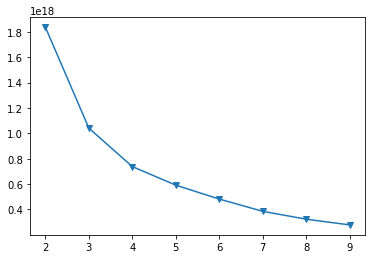

In [20]:
plt.plot(all_clusters,sum_of_squared_distances,marker="v")

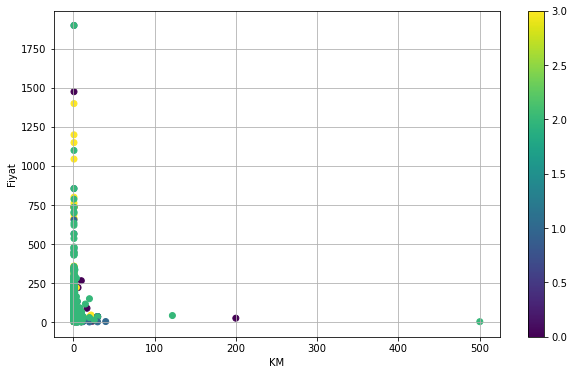

In [30]:
plt.figure(figsize=(10,6))
plt.scatter(x=x["Order_Items.qty"],y=x["Order_Items.price"],c=predicts[2])
plt.xlabel('KM')
plt.ylabel('Fiyat')
plt.colorbar()
plt.grid()